# Neural Network by scratch

### Importing Numpy and Pandas 

In [1]:
import numpy as np
import pandas as pd

### Loading the Dataset as a Pandas Dataframe

In [2]:
data = pd.read_csv('train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train and Validation set split
We need to first convert the dataframe into a numpy array and transpose it

In [3]:
data = np.array(data)
m , n = data.shape
print(f'data.shape = {m,n}\n')
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:1000]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:m]

X_train = X_train / 255
print(f'X_train.shape = {X_train.shape}')
print(f'Y_train.shape = {Y_train.shape}')

data.shape = (42000, 785)

X_train.shape = (784, 41000)
Y_train.shape = (41000,)


In [4]:
print(f'X_dev.shape = {X_dev.shape}')
print(f'Y_dev.shape = {Y_dev.shape}')

X_dev.shape = (784, 1000)
Y_dev.shape = (1000,)


### Initializing Parameters

In [5]:
def init_params():

    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    
    return W1, b1, W2, b2

### ReLu Function

In [6]:
def ReLu(Z):
    return np.maximum(Z,0)

### Softmax Function

In [7]:
def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

### Forward Propagation

In [8]:
def forward_prop(W1, b1, W2, b2, X):
    
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

### Derivative of ReLu

In [9]:
def deriv_relu(Z):
    return Z>0

### One Hot Encoder Function

In [10]:
def one_hot(Y):
    
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y

### Backward Propagation

In [11]:
def back_prop(Z1, A1, Z2, A2, W2, X, Y):

    m = Y.shape[0]
    
    dZ2 = A2 - one_hot(Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * deriv_relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * sum(dZ1)
    
    return dW1, db1, dW2, db2

### Update Parameters

In [12]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):

    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return W1, b1, W2, b2

### Prediction and Accuracy functions

In [54]:
def make_prediction(A2):
    return np.argmax(A2, 0)

def get_accuracy(Y_hat, Y):
#     print(Y_hat, Y)
    return np.sum(Y_hat==Y)/Y.size

### Training Function

In [59]:
def train(X, Y, iterations, alpha,):
    
    W1, b1, W2, b2 = init_params()
    
    acc = []
    for i in range(iterations+1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if (i%10 == 0):
            
            a = get_accuracy(make_prediction(A2),Y)
            acc.append(a)
            
#             print(f'Iteration: {i}')
#             print(f'Accuracy: {a}')
            
    print(f'LR: {alpha}')
    print(f'Max accuracy: {max(acc)}\n')
    
    return W1, b1, W2, b2, acc

### LR Tuning

In [ ]:
def LR_train(X, Y, iterations, alpha,):
    
    W1, b1, W2, b2 = init_params()
    
    acc = []
    for i in range(iterations+1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if (i%10 == 0):
            
            a = get_accuracy(make_prediction(A2),Y)
            acc.append(a)

    print(f'LR: {alpha}')
    print(f'Max accuracy: {max(acc)}\n')
    
    return acc

In [62]:
def LR_tuning(a1, a2):
    lr = dict()
    
    for i in np.arange(a1, a2, 0.01):
        
        acc = LR_train(X_train, Y_train, 500, i)
        lr[i] = max(acc)
        
    return max(lr, key= lambda x: lr[x]) 

In [65]:
print(f'Best Learning Rate: {LR_tuning(0.17,0.24)}')

LR: 0.17
Max accuracy: 0.8753414634146341

LR: 0.18000000000000002
Max accuracy: 0.8812926829268293

LR: 0.19000000000000003
Max accuracy: 0.8831463414634146

LR: 0.20000000000000004
Max accuracy: 0.8832439024390244

LR: 0.21000000000000005
Max accuracy: 0.8832439024390244

LR: 0.22000000000000006
Max accuracy: 0.8816829268292683

LR: 0.23000000000000007
Max accuracy: 0.8831951219512195

Best Learning Rate: 0.20000000000000004


In [29]:
W1, b1, W2, b2, acc = train(X_train , Y_train, 750, 0.2)

[4 7 7 ... 4 7 9] [9 8 3 ... 5 8 7]
Iteration: 0
Accuracy: 0.11509756097560976
[4 8 2 ... 7 7 9] [9 8 3 ... 5 8 7]
Iteration: 10
Accuracy: 0.26482926829268294
[7 8 2 ... 7 8 9] [9 8 3 ... 5 8 7]
Iteration: 20
Accuracy: 0.39234146341463416
[7 8 3 ... 7 8 7] [9 8 3 ... 5 8 7]
Iteration: 30
Accuracy: 0.47136585365853656
[7 8 3 ... 7 8 7] [9 8 3 ... 5 8 7]
Iteration: 40
Accuracy: 0.5320731707317073
[7 8 3 ... 7 8 7] [9 8 3 ... 5 8 7]
Iteration: 50
Accuracy: 0.5941951219512195
[9 8 3 ... 7 8 7] [9 8 3 ... 5 8 7]
Iteration: 60
Accuracy: 0.6775609756097561
[9 8 3 ... 7 8 7] [9 8 3 ... 5 8 7]
Iteration: 70
Accuracy: 0.7204634146341463
[9 8 3 ... 7 8 7] [9 8 3 ... 5 8 7]
Iteration: 80
Accuracy: 0.745609756097561
[9 8 3 ... 7 8 7] [9 8 3 ... 5 8 7]
Iteration: 90
Accuracy: 0.7638780487804878
[9 8 3 ... 7 8 7] [9 8 3 ... 5 8 7]
Iteration: 100
Accuracy: 0.779219512195122
[9 8 3 ... 7 8 7] [9 8 3 ... 5 8 7]
Iteration: 110
Accuracy: 0.791219512195122
[9 8 3 ... 7 8 7] [9 8 3 ... 5 8 7]
Iteration: 120

### Accuracy Curve for LR=0.2

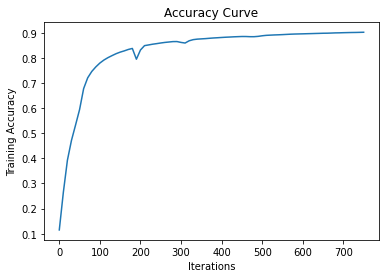

In [33]:
from matplotlib import pyplot as plt
        
iterations = np.arange(0,751,10)
plt.plot(iterations, acc)
plt.xlabel('Iterations')
plt.ylabel('Training Accuracy')
plt.title('Accuracy Curve')
plt.show()

### Validation Set Accuracy

In [46]:
X_dev = X_dev / 255

print(W1.shape, b1.shape, X_dev.shape)
_, _, _, A2 = forward_prop(W1, b1[:,1000], W2, b2[:,1000], X_dev)
get_accuracy(make_prediction(A2), Y_dev)

(10, 784) (10, 41000) (784, 1000)


ValueError: operands could not be broadcast together with shapes (10,1000) (10,) 